In [159]:
from os import path
import os
import pandas as pd
import numpy as np
import requests, zipfile, io, os
pd.set_option('display.max_colwidth', -1)
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import re

/var/folders/mk/7yynft554x38v3t6f_65fkzc0000gn/T/ipykernel_36449/4239083415.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [203]:
df_epwDD = pd.read_csv('AllRegion_Results.csv') 
#df_epwDD["ID"] = df_epwDD.index +1
df_epwDD

,Location Name,Coordinates,WMO,last_year,Country,Latitude,Longitude,Heating DB 99.6%,Heating DB 99%,Cooling DB 0.4%,...,Evaporation MCDB 0.4%,Evaporation WB 1%,Evaporation MCDB 1%,Evaporation WB 2%,Evaporation MCDB 2%,ID,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW
0,Bremerhaven HB DEU,"['8.58300', '53.53300', '5.0']",101290,DEU_HB_Bremerhaven_101290_TRY2010_01_Somm_BBSR,Germany,53.5333N,8.5761E,-9.4,-7.0,27.2,...,25.0,19.2,23.2,18.3,22.0,1,-8.1,-5.9,30.1964,27.840999999999987
1,Bremerhaven HB DEU,"['8.58300', '53.53300', '5.0']",101290,DEU_HB_Bremerhaven_101290_TRY2035_01_Wint_BBSR,Germany,53.5333N,8.5761E,-9.4,-7.0,27.2,...,25.0,19.2,23.2,18.3,22.0,2,-3.9964,-1.7,30.2,28.1
2,Bremerhaven HB DEU,"['8.58300', '53.53300', '5.0']",101290,DEU_HB_Bremerhaven_101290_TRY2035_01_Somm_BBSR,Germany,53.5333N,8.5761E,-9.4,-7.0,27.2,...,25.0,19.2,23.2,18.3,22.0,3,-1.0,-0.2,30.5964,29.1
3,Bremerhaven HB DEU,"['8.58300', '53.53300', '5.0']",101290,DEU_HB_Bremerhaven_101290_TRY2035_01_Jahr_BBSR,Germany,53.5333N,8.5761E,-9.4,-7.0,27.2,...,25.0,19.2,23.2,18.3,22.0,4,-2.5,-1.7,28.5,26.740999999999985
4,Bremerhaven HB DEU,"['8.58300', '53.53300', '5.0']",101290,DEU_HB_Bremerhaven_101290_TRY2010_01_Wint_BBSR,Germany,53.5333N,8.5761E,-9.4,-7.0,27.2,...,25.0,19.2,23.2,18.3,22.0,5,-8.5,-7.2,29.0,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30460,Le.Moleson FR CHE,"['7.01780', '46.54610', '1975.2']",66090,2018,Switzerland,46.5462N,7.0177E,-15.1,-13.1,19.8,...,18.1,13.7,16.8,12.7,15.8,2745,-5.3964,-3.9,30.3,28.5
30461,Hopen.Island SV SJM,"['25.01310', '76.50950', '10.2']",10620,TMYx,SvalbardandJanMayen,76.509N,25.013E,-27.1,-24.9,7.3,...,7.1,6.0,6.4,5.4,5.8,64,-23.1,-21.0,21.0,19.640999999999988
30462,Santis AI CHE,"['9.34360', '47.24940', '2494.2']",66800,2018,Switzerland,47.2494N,9.3436E,-18.6,-16.7,14.9,...,13.2,9.9,12.3,9.0,11.2,2856,-10.8,-8.041,28.6,27.4
30463,Piz.Corvatsch GR CHE,"['9.82110', '46.41810', '3302.3']",67910,2018,Switzerland,46.4181N,9.8211E,-23.5,-21.6,9.2,...,8.2,5.3,7.2,4.5,6.3,2976,-12.7,-11.6,28.0964,26.7


In [204]:
#df_results.set_index('ID')

In [ ]:
#should be done in the 02 script!

#The first two digits are referred to as the "block number" and refer to the geographic area 
#(00-29 Europe, 30-59 Asia, 60-68 Africa, 69 special use, 70-79 North America, 80-89 South America, 90-99 Oceania). 
#The last three digits are loosely referred to as the "station number".

df_results['Region_number'] = df_results['WMO'].astype(str).str[:2]
df_results['Region_number']= df_results['Region_number'].astype(int)

df_results["Region"] = pd.cut(
    x=df_results["Region_number"],
    bins=[0, 29, 59,68,69,79,89,99, np.inf],
    labels=["Europe", "Asia", "Africa","special","North America","South America","Oceania","other"],
)

df_results['last_year'] = df_results['last_year'].astype('string')
#df_results['last_year'] = df_results['last_year'].str.replace('TMYx','-')
df_results['last_year'] = df_results['last_year'].str[-4:]

df_results

In [16]:
df_results['delta - Heating DB 99.6%'] = df_results['Heating DB 99.6%'] - df_results['Heating DB 99.6% - EPW']
df_results['delta - Heating DB 99%'] = df_results['Heating DB 99%'] - df_results['Heating DB 99% - EPW']
df_results['delta - Cooling DB 0.4%'] = df_results['Cooling DB 0.4%'] - df_results['Cooling DB 0.4% - EPW']
df_results['delta - Cooling DB 1%'] = df_results['Cooling DB 1%'] - df_results['Cooling DB 1% - EPW']
df_results

,Location Name,Coordinates,WMO,last_year,Country,Latitude,Longitude,Heating DB 99.6%,Heating DB 99%,Cooling DB 0.4%,...,Evaporation MCDB 2%,ID,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
0,Jan.Mayen JN SJM,"['-8.66800', '70.94000', '9.0']",10010,010010_TMYx,SvalbardandJanMayen,70.940N,8.668W,-14.0,-11.8,9.6,...,8.2,1,-14.4000,-12.9,9.6964,8.500,0.4000,1.1,-0.0964,0.400
1,Jan.Mayen JN SJM,"['-8.66800', '70.94000', '9.0']",10010,2021,SvalbardandJanMayen,70.940N,8.668W,-14.0,-11.8,9.6,...,8.2,2,-14.4000,-12.9,9.6964,8.500,0.4000,1.1,-0.0964,0.400
2,Jan.Mayen JN SJM,"['-8.61710', '70.96200', '9.0']",10010,2018,SvalbardandJanMayen,70.940N,8.668W,-14.0,-11.8,9.6,...,8.2,3,-11.0000,-10.4,9.7000,9.000,-3.0000,-1.4,-0.1000,-0.100
3,Hornsund SV SJM,"['15.50000', '77.00000', '12.0']",10030,2018,SvalbardandJanMayen,77.000N,15.500E,-22.1,-20.5,8.1,...,6.3,4,-12.5000,-11.0,10.1000,9.200,-9.6000,-9.5,-2.0000,-2.000
4,Hornsund SV SJM,"['15.50000', '77.00000', '12.0']",10030,2021,SvalbardandJanMayen,77.000N,15.500E,-22.1,-20.5,8.1,...,6.3,5,-15.2000,-14.3,8.0000,7.400,-6.9000,-6.2,0.1000,-0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,Wittmundhafen.AB NI DEU,"['7.66720', '53.55030', '11.8']",101260,2021,Germany,53.5503N,7.6672E,-7.8,-5.8,29.1,...,23.4,3768,-9.7964,-7.4,27.6964,25.382,1.9964,1.6,1.4036,1.418
3768,Wittmundhafen.AB NI DEU,"['7.66720', '53.55030', '11.8']",101260,101260_TMYx,Germany,53.5503N,7.6672E,-7.8,-5.8,29.1,...,23.4,3769,-5.0000,-4.0,27.4928,25.000,-2.8000,-1.8,1.6072,1.800
3769,Wittmundhafen.AB NI DEU,"['7.66720', '53.55030', '11.8']",101260,2018,Germany,53.5503N,7.6672E,-7.8,-5.8,29.1,...,23.4,3770,-5.1000,-4.0,29.0000,26.900,-2.7000,-1.8,0.1000,-0.100
3770,Bremerhaven HB DEU,"['8.57610', '53.53330', '5.5']",101290,101290_TMYx,Germany,53.5333N,8.5761E,-9.4,-7.0,27.2,...,22.0,3771,-4.0000,-3.0,27.4964,25.241,-5.4000,-4.0,-0.2964,-0.141


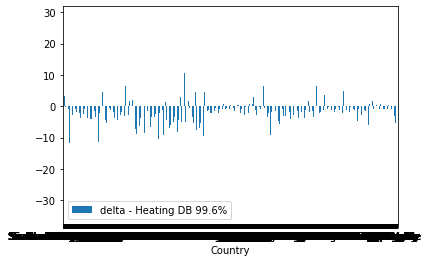

In [17]:
ax = df_results.plot.bar(x='Country', y='delta - Heating DB 99.6%', rot=0)

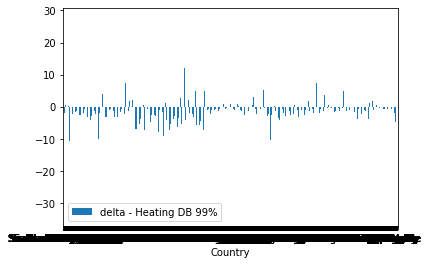

In [18]:
ax = df_results.plot.bar(x='Country', y='delta - Heating DB 99%', rot=0)

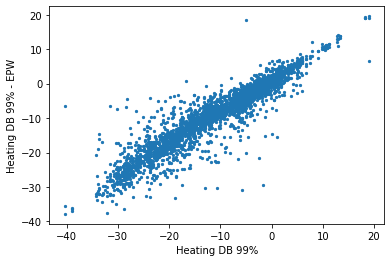

In [45]:
df_results.plot.scatter(x="Heating DB 99%", y="Heating DB 99% - EPW", s=5);

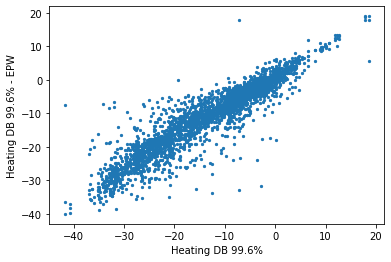

In [46]:
df_results.plot.scatter(x="Heating DB 99.6%", y="Heating DB 99.6% - EPW", s=5);

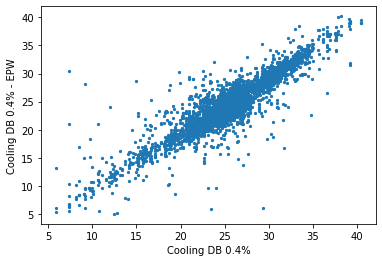

In [48]:
df_results.plot.scatter(x="Cooling DB 0.4%", y="Cooling DB 0.4% - EPW", s=5);

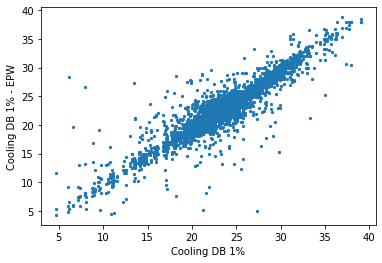

In [49]:
df_results.plot.scatter(x="Cooling DB 1%", y="Cooling DB 1% - EPW", s=5);

In [41]:
df_results['Country'].unique()

array(['SvalbardandJanMayen', 'Norway', 'Sweden', 'Finland',
       'UnitedKingdom', 'IsleofMan', 'Guernsey', 'Jersey', 'Ireland',
       'Iceland', 'Greenland', 'FaroeIslands', 'Denmark', 'Netherlands',
       'Belgium', 'Luxembourg', 'Switzerland', 'Liechtenstein', 'France',
       'Spain', 'Gibraltar', 'Portugal', 'CapeVerde', 'Germany'],
      dtype=object)

In [42]:
df_results['Region'].unique()

['Europe', 'Asia', 'Africa', 'special', 'North America', 'South America']
Categories (8, object): ['Europe' < 'Asia' < 'Africa' < 'special' < 'North America' < 'South America' < 'Oceania' < 'other']

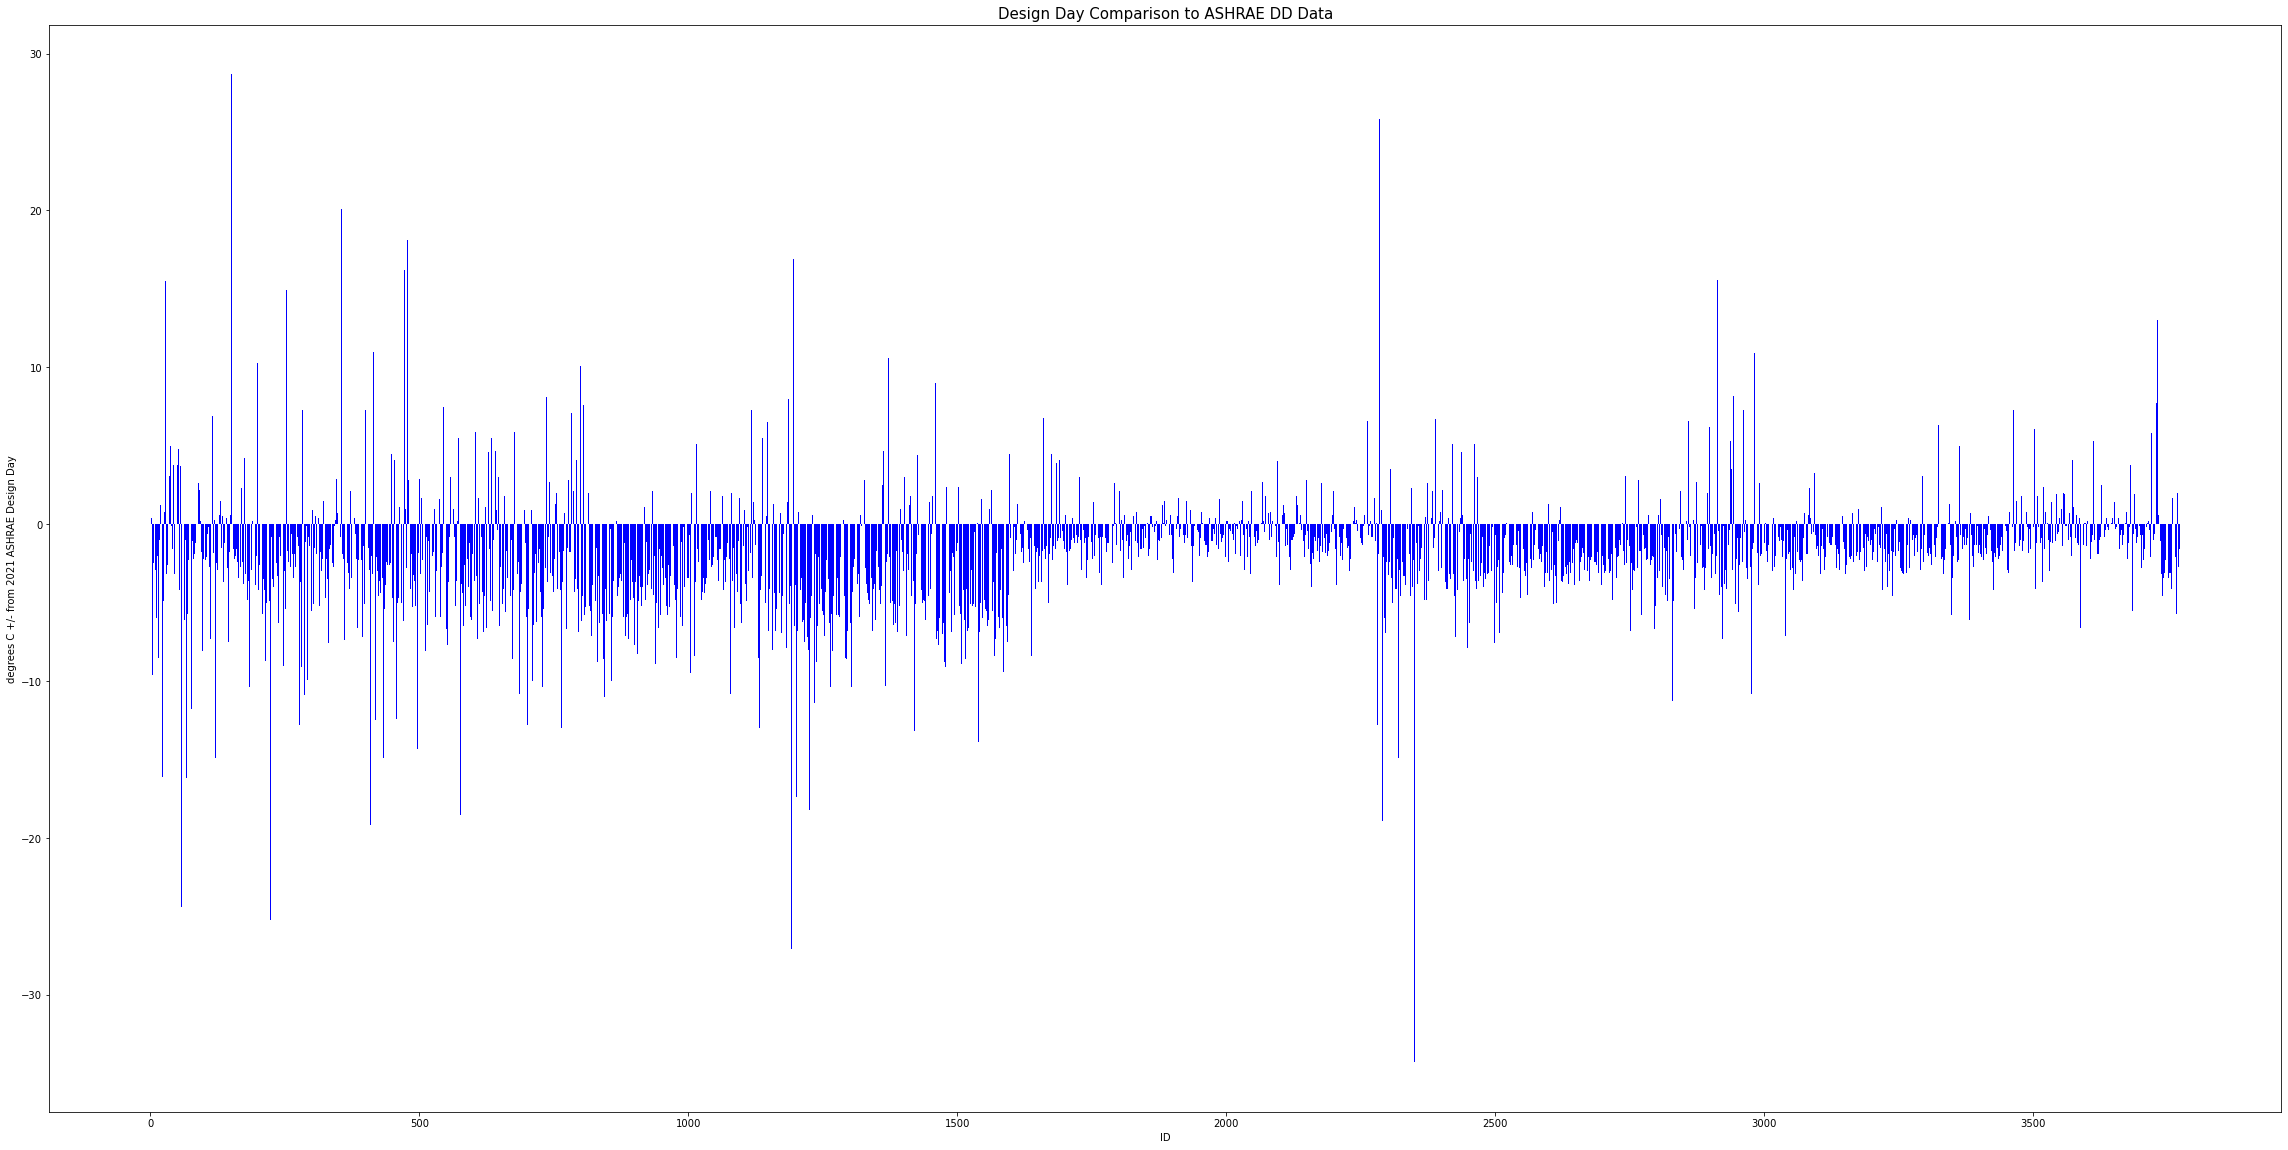

In [57]:
plt.title('Design Day Comparison to ASHRAE DD Data',fontsize=15)
plt.xlabel('ID',fontsize=10)
plt.ylabel('degrees C +/- from 2021 ASHRAE Design Day',fontsize=10)
plt.bar(df_results['ID'], df_results['delta - Heating DB 99.6%'], color='blue')
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

In [61]:
#sort by largest to smallest error and plot histogram
df_results= df_results.sort_values(by=['delta - Heating DB 99.6%'], ascending=False)
df_results.head()

,Location Name,Coordinates,WMO,last_year,Country,Latitude,Longitude,Heating DB 99.6%,Heating DB 99%,Cooling DB 0.4%,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%,Region_number,Region
150,Krakenes.Lighthouse SF NOR,"['4.98580', '62.03390', '39.8']",12030,2018,Norway,62.0342N,4.9862E,-2.9,-1.7,21.3,...,-31.5964,-29.282,21.6000,19.841,28.6964,27.582,-0.3000,-0.241,12,Europe
2284,Grimsey.AP-Grimsey.Island NE ISL,"['-18.01700', '66.54400', '17.0']",41650,2021,Iceland,66.544N,18.017W,-7.2,-5.8,14.8,...,-33.0000,-30.900,11.4000,10.200,25.8000,25.100,3.4000,3.300,41,Asia
69,Slettnes.Lighthouse FI NOR,"['28.21690', '71.08890', '10.0']",10780,2018,Norway,71.089N,28.217E,-12.5,-10.6,18.3,...,-33.8964,-30.200,23.2964,21.400,21.3964,19.600,-4.9964,-5.700,10,Europe
354,Utsira.Lighthouse RO NOR,"['4.87220', '59.30640', '56.3']",14030,2021,Norway,59.306N,4.872E,-3.7,-2.5,20.9,...,-23.7964,-21.500,24.5964,23.100,20.0964,19.000,-3.6964,-3.700,14,Europe
477,Oslo-Fornebu.AP OS NOR,"['10.61700', '59.90000', '17.0']",14881,2018,Norway,61.206N,1.829E,0.1,1.1,18.2,...,-17.9964,-15.541,23.1964,22.100,18.0964,16.641,-4.9964,-5.900,14,Europe


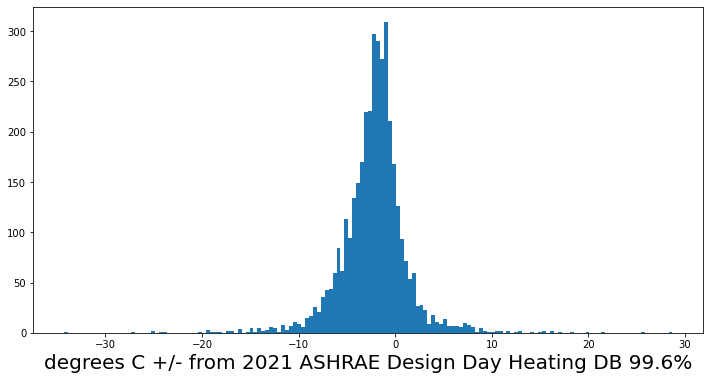

In [106]:
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Heating DB 99.6%',fontsize=20)
n, bins, patches = plt.hist(x= df_results['delta - Heating DB 99.6%'], bins='auto')
plt.rcParams['figure.figsize'] = [12, 6]
#plt.xticks(bins)
plt.show()

In [128]:
dist = df_results.drop(df_results.columns[0:26],axis=1)
cols = [30,31]
dist.drop(df_results.columns[cols],axis=1,inplace=True)
dist

,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
150,28.6964,27.582,-0.3000,-0.241
2284,25.8000,25.100,3.4000,3.300
69,21.3964,19.600,-4.9964,-5.700
354,20.0964,19.000,-3.6964,-3.700
477,18.0964,16.641,-4.9964,-5.900
...,...,...,...,...
57,-24.4000,-22.800,5.4000,4.859
222,-25.2000,-23.800,7.1000,5.800
3736,-25.2000,-23.559,0.7000,-2.000
1191,-27.1000,-25.200,3.5000,2.100


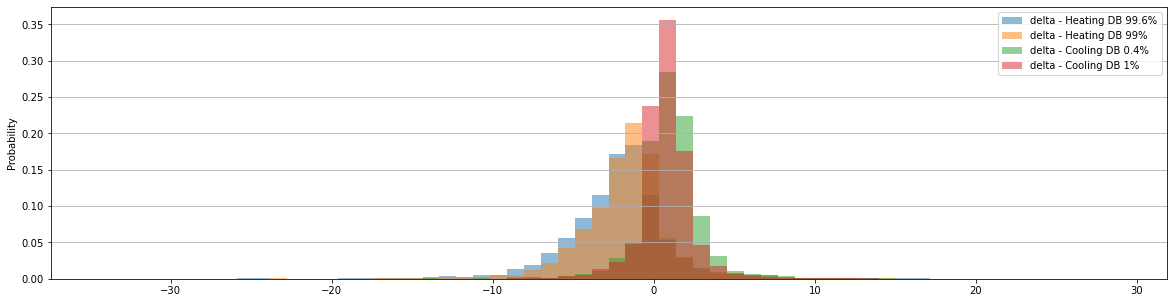

In [144]:
fig, ax = plt.subplots()
#dist.plot.kde(ax=ax, legend=False, title='delta Heating/Cooling DD')
dist.plot.hist(density=True, ax=ax, bins=60, alpha=0.5)
ax.set_ylabel('Probability')
ax.grid(axis='y')
#ax.set_facecolor('#d8dcd6')

In [136]:
df_results.describe()

,WMO,Heating DB 99.6%,Heating DB 99%,Cooling DB 0.4%,Cooling MCWB 0.4%,Cooling DB 1%,Cooling MCWB 1%,Cooling DB 2%,Cooling MCWB 2%,Evaporation WB 0.4%,...,ID,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%,Region_number
count,3772.000000,3772.000000,3772.000000,3772.000000,3760.000000,3772.000000,3760.000000,3772.000000,3760.000000,3760.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,43224.178420,-11.610870,-9.478897,25.450742,17.597181,23.601617,16.836436,21.956787,16.091090,18.801782,...,1886.500000,-9.402371,-7.717072,24.460322,22.864323,-2.208499,-1.761825,0.990420,0.737294,41.890244
std,23630.720528,10.254128,9.642239,4.932638,3.002482,4.809230,3.038667,4.684609,3.061259,3.148195,...,1089.026936,9.584709,8.995307,5.026599,4.866617,3.603627,3.279924,2.126484,1.906252,23.156212
min,10010.000000,-41.800000,-40.400000,5.900000,2.000000,4.700000,1.400000,3.700000,0.900000,3.800000,...,1.000000,-40.000000,-37.800000,5.000000,4.300000,-34.303600,-34.000000,-23.100000,-22.300000,10.000000
25%,25210.000000,-19.350000,-16.700000,23.000000,16.400000,21.200000,15.500000,19.600000,14.700000,17.600000,...,943.750000,-15.924100,-13.641000,21.800000,20.300000,-3.800000,-3.059000,0.109900,0.089750,24.000000
50%,33805.000000,-8.200000,-6.000000,25.700000,18.200000,23.800000,17.300000,22.000000,16.500000,19.400000,...,1886.500000,-6.200000,-4.700000,24.400000,22.900000,-2.000000,-1.500000,1.000000,0.700000,33.000000
75%,66590.000000,-4.000000,-2.500000,27.925000,19.600000,26.000000,18.900000,24.100000,18.000000,20.700000,...,2829.250000,-2.696400,-1.600000,27.396400,25.386500,-0.607200,-0.400000,2.000000,1.459000,66.000000
max,101290.000000,18.600000,19.000000,40.400000,24.800000,39.000000,24.700000,37.500000,24.400000,26.100000,...,3772.000000,19.000000,19.559000,40.200000,38.800000,28.696400,27.582000,23.300000,22.300000,85.000000


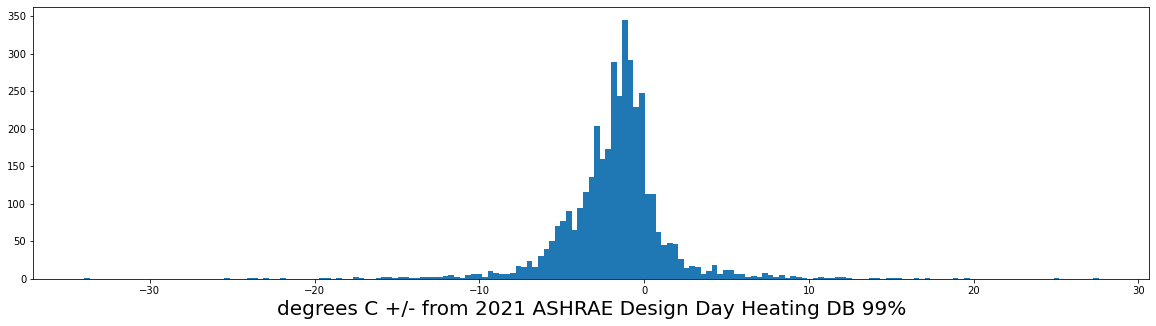

In [138]:
df_results= df_results.sort_values(by=['delta - Heating DB 99%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Heating DB 99%',fontsize=20)
plt.hist(x= df_results['delta - Heating DB 99%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

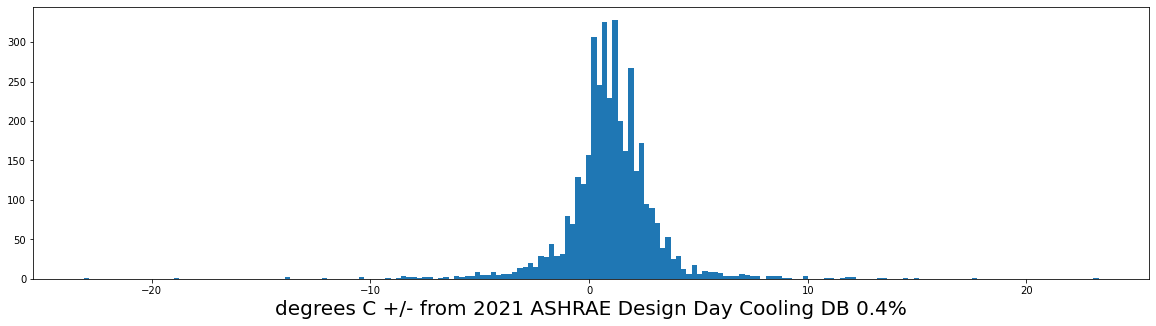

In [139]:
df_results= df_results.sort_values(by=['delta - Cooling DB 0.4%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Cooling DB 0.4%',fontsize=20)
plt.hist(x= df_results['delta - Cooling DB 0.4%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

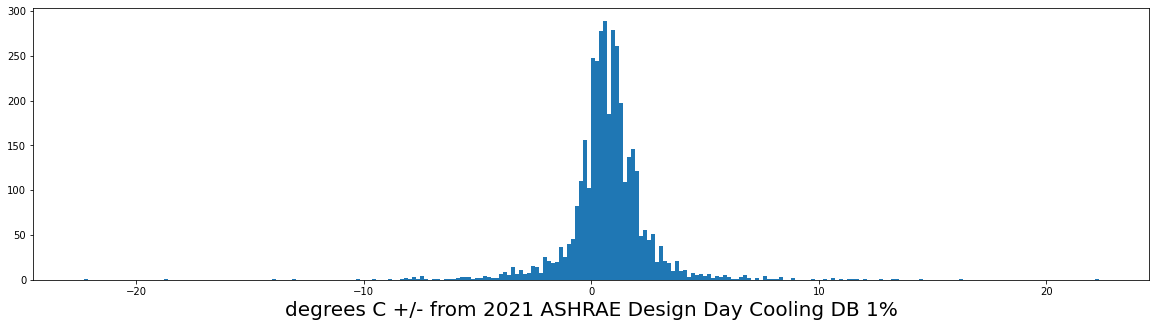

In [140]:
df_results= df_results.sort_values(by=['delta - Cooling DB 1%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Cooling DB 1%',fontsize=20)
plt.hist(x= df_results['delta - Cooling DB 1%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

In [183]:
df_results.groupby(by="WMO").max()

,Location Name,Coordinates,last_year,Country,Latitude,Longitude,Heating DB 99.6%,Heating DB 99%,Cooling DB 0.4%,Cooling MCWB 0.4%,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%,Region_number,Region
WMO,,,,,,,,,,,,,,,,,,,,,
10010,Jan.Mayen JN SJM,"['-8.66800', '70.94000', '9.0']",TMYx,SvalbardandJanMayen,70.940N,8.668W,-14.0,-11.8,9.6,8.0,...,-11.0000,-10.400,9.7000,9.000,0.4000,1.1,-0.0964,0.4,10,Europe
10030,Hornsund SV SJM,"['15.50000', '77.00000', '12.0']",TMYx,SvalbardandJanMayen,77.000N,15.500E,-22.1,-20.5,8.1,6.1,...,-12.5000,-11.000,10.1000,9.200,-2.5036,-2.3,0.5000,0.3,10,Europe
10060,Edgeoya SV SJM,"['22.82250', '78.25060', '14.0']",TMYx,Norway,78.251N,22.823E,-28.0,-25.7,9.2,7.3,...,-20.8000,-18.200,8.2000,7.400,-2.9036,-3.7,3.1036,2.7,10,Europe
10070,Ny-Alesund SV SJM,"['11.93310', '78.92280', '7.7']",TMYx,SvalbardandJanMayen,78.9228N,11.9331E,-25.2,-22.7,9.9,6.8,...,-18.3964,-17.400,10.7000,9.041,-4.2000,-3.2,1.9000,1.1,10,Europe
10080,Svalbard.AP-Longyear SV SJM,"['15.46600', '78.24600', '26.8']",TMYx,SvalbardandJanMayen,78.246N,15.466E,-28.5,-25.8,11.9,8.3,...,-19.9964,-18.182,11.6000,10.600,2.7892,1.9,2.0036,2.2,10,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100910,Cape.Arkona MV DEU,"['13.43420', '54.67920', '41.7']",TMYx,Germany,54.6792N,13.4342E,-8.1,-5.9,23.1,18.2,...,-2.6000,-2.000,25.0928,23.200,-5.5000,-3.9,-1.9928,-1.5,10,Europe
100970,Greifswalder.Oie MV DEU,"['13.91030', '54.24360', '11.2']",TMYx,Germany,54.2436N,13.9103E,-6.8,-5.1,23.9,19.6,...,-3.6000,-2.600,22.9000,21.800,-1.8000,-0.9,1.9000,1.8,10,Europe
101220,Jever.AB NI DEU,"['7.88900', '53.53400', '7.3']",TMYx,Germany,53.534N,7.889E,-8.8,-6.9,28.4,19.6,...,-3.1000,-2.500,26.5928,25.000,0.8000,0.1,5.5036,4.2,10,Europe


In [186]:
n_by_country = df_results.groupby("Country")["WMO"].count()
n_by_country

Country
Belgium                86 
CapeVerde              6  
Denmark                133
FaroeIslands           12 
Finland                477
France                 520
Germany                36 
Gibraltar              3  
Greenland              99 
Guernsey               3  
Iceland                55 
Ireland                53 
IsleofMan              5  
Jersey                 3  
Liechtenstein          3  
Luxembourg             3  
Netherlands            110
Norway                 471
Portugal               98 
Spain                  119
SvalbardandJanMayen    21 
Sweden                 627
Switzerland            255
UnitedKingdom          574
Name: WMO, dtype: int64

In [187]:
n_by_region = df_results.groupby("Region")["WMO"].count()
n_by_region

Region
Europe           1632
Asia             792 
Africa           599 
special          3   
North America    520 
South America    226 
Oceania          0   
other            0   
Name: WMO, dtype: int64

In [194]:
n_by_tet = df_results.groupby(["WMO","last_year"])['delta - Heating DB 99.6%'].max()
n_by_tet

WMO     last_year
10010   2018        -3.0000
        2021         0.4000
        TMYx         0.4000
10030   2018        -9.6000
        2021        -6.9000
                      ...  
101260  2018        -2.7000
        2021         1.9964
        TMYx        -2.8000
101290  BBSR        -1.6000
        TMYx        -5.4000
Name: delta - Heating DB 99.6%, Length: 3772, dtype: float64

In [197]:
n_by_tet = df_results.groupby(["WMO"])['delta - Heating DB 99.6%'].min()
n_by_tet

WMO
10010    -3.0000
10030    -9.6000
10060    -7.2000
10070    -6.8036
10080    -8.5036
           ...  
100910   -5.5000
100970   -3.2000
101220   -5.7000
101260   -2.8000
101290   -5.4000
Name: delta - Heating DB 99.6%, Length: 1325, dtype: float64

In [201]:
df_heating996= df_results.sort_values('delta - Heating DB 99.6%').drop_duplicates(['WMO'], keep='first')
df_heating996

,Location Name,Coordinates,WMO,last_year,Country,Latitude,Longitude,Heating DB 99.6%,Heating DB 99%,Cooling DB 0.4%,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%,Region_number,Region
2349,Cape.Morris.Jesup UO GRL,"['-33.29600', '83.58800', '733.0']",43010,2021,Greenland,83.656N,33.374W,-41.8,-40.4,7.3,...,-7.4964,-6.400,10.3,9.200,-34.3036,-34.000,-3.0,-3.200,43,Asia
1191,Salla.Naruska LA FIN,"['29.17780', '67.16220', '214.7']",27450,TMYx,Finland,67.162N,29.178E,-34.2,-31.6,25.2,...,-7.1000,-6.400,21.7,21.000,-27.1000,-25.200,3.5,2.100,27,Europe
222,Tynset.Hansmoen HE NOR,"['10.73190', '62.26940', '482.3']",12650,TMYx,Norway,62.269N,10.732E,-31.9,-28.3,24.6,...,-6.7000,-4.500,17.5,16.600,-25.2000,-23.800,7.1,5.800,12,Europe
3736,Weeze.AP NW DEU,"['6.14200', '51.60200', '32.3']",100001,2018,Germany,51.602N,6.142E,-7.2,-5.0,30.8,...,18.0000,18.559,30.1,30.000,-25.2000,-23.559,0.7,-2.000,10,Europe
57,Suolovuopmi-Lulit FI NOR,"['23.53440', '69.57940', '381.0']",10580,2018,Norway,69.579N,23.534E,-32.9,-30.1,21.6,...,-8.5000,-7.300,16.2,14.541,-24.4000,-22.800,5.4,4.859,10,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,Brehat.Island BT FRA,"['-3.00000', '48.85000', '36.0']",71210,TMYx,France,48.856N,3.004W,-0.2,1.2,22.2,...,-3.4928,-1.600,26.2,23.400,3.2928,2.800,-4.0,-2.300,71,North America
593,Palkem NB SWE,"['21.63300', '66.38300', '263.0']",21640,TMYx,Sweden,66.383N,21.633E,-26.4,-23.4,22.2,...,-29.9000,-27.400,24.7,23.000,3.5000,4.000,-2.5,-2.500,21,Europe
1758,Fife.Ness SCT GBR,"['-2.58700', '56.27900', '12.0']",31740,TMYx,UnitedKingdom,56.279N,2.587W,-0.6,0.4,20.3,...,-4.6000,-2.741,22.0,21.000,4.0000,3.141,-1.7,-2.000,31,Asia
1596,Muckle.Flugga-Shetland.Islands SCT GBR,"['-0.88537', '60.85525', '53.0']",30010,TMYx,UnitedKingdom,60.855N,0.886W,-0.2,0.8,16.5,...,-4.7000,-4.000,20.0,19.100,4.5000,4.800,-3.5,-3.700,30,Asia
